<a href="https://colab.research.google.com/github/riddhinsanghvi/Abnormal-Activity-Detection/blob/main/Final_YOLOv8_DeepSORT_TRACKING_SCRIPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before Running the Script Please Make Sure you Select the Run Time as GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Clone the Github Repo**

In [ ]:
#!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git

Cloning into 'YOLOv8-DeepSORT-Object-Tracking'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 403 (delta 21), reused 19 (delta 19), pack-reused 370
Receiving objects: 100% (403/403), 77.99 MiB | 31.32 MiB/s, done.
Resolving deltas: 100% (206/206), done.


##Setting the Current Directory

In [ ]:
%cd /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking

/content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking


##Install all the Dependencies

In [ ]:
!pip install -e '.[dev]'

Obtaining file:///content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Moving to the Required Directory

In [ ]:
%cd /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

/content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


##To implement the DeepSORT tracking, downloading the required files

In [ ]:
#!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:01<00:00, 28.3MB/s]


##Unzipping the DeepSORT Files

In [ ]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
replace deep_sort_pytorch/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: deep_sort_pytorch/.gitignore  
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
  inflating: deep_sort_pytorch/deep_sort/deep/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/deep/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pyto

##Lets Run the Script

In [ ]:
import os

# Path to the directory containing the .avi files
avi_directory = "/content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/"

# Get a list of all .avi files in the directory
avi_files = [file for file in os.listdir(avi_directory) if file.endswith(".avi") or file.endswith(".mp4")]

# Add _number to each video file name
numbered_avi_files = [f"{file}_{i+1}" for i, file in enumerate(avi_files)]

# Construct the source parameter as a comma-separated string
source_param = '"' + ', '.join(numbered_avi_files) + '"'
print(source_param)

"Shoplifting001_x264.mp4_1, 000001.avi_2"


In [ ]:
!python predict.py --multirun model=yolov8l.pt source={source_param}

Streaming output truncated to the last 5000 lines.
Video Number:  1
video 1/1 (2194/4344) /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Shoplifting001_x264.mp4: 480x640 1 person, 26.3ms
Video Number:  1
video 1/1 (2195/4344) /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Shoplifting001_x264.mp4: 480x640 1 person, 1 umbrella, 26.2ms
Video Number:  1
video 1/1 (2196/4344) /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Shoplifting001_x264.mp4: 480x640 1 person, 25.4ms
Video Number:  1
video 1/1 (2197/4344) /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Shoplifting001_x264.mp4: 480x640 2 persons, 27.2ms
Video Number:  1
video 1/1 (2198/4344) /content/drive/MyDrive/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Shoplifting001_x264.mp4: 480x640 2 persons, 26.6ms
Video Number:  1
video 1/1 (2199/4344) /content/drive/MyDrive/YOLOv8-DeepSORT-Ob

##**LSTM Classifier**




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the CSV file
data = pd.read_csv("output_1.csv")

# Preprocessing
# Assuming your CSV has columns like 'frame', 'x_coordinate', 'y_coordinate', 'class_label'
# Where 'class_label' indicates whether the activity is normal or abnormal
# Modify this according to your actual data format

# Encoding labels
label_encoder = LabelEncoder()
data['Class '] = label_encoder.fit_transform(data['Class '])

# Split data into sequences (time-series data)
# Assuming each sequence contains a fixed number of frames (adjust according to your data)
sequence_length = 10
sequences = []
labels = []

for i in range(len(data) - sequence_length + 1):
    sequence = data.iloc[i:i+sequence_length]
    sequences.append(sequence[['Video Number', 'Frame Number', 'Person Number', 'Left Coordinate',
       'Top Coordinate', 'Width', 'Height']].values)
    labels.append(sequence['Class '].values[-1])

# Convert lists to arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.4, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 7)))  # Assuming 2 coordinates per frame
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

from sklearn.metrics import classification_report


# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_classes, average='binary')
print(f"Precision: {precision},\nRecall: {recall}, \nF1 Score: {f1_score}")

Epoch 1/10
157/157 [==============================] - 5s 14ms/step - loss: 0.3409 - accuracy: 0.8378 - val_loss: 0.2571 - val_accuracy: 0.8476
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 0.2250 - accuracy: 0.8516 - val_loss: 0.2033 - val_accuracy: 0.8476
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1781 - accuracy: 0.9460 - val_loss: 0.1595 - val_accuracy: 0.9704
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1579 - accuracy: 0.9627 - val_loss: 0.1553 - val_accuracy: 0.9719
Epoch 5/10
157/157 [==============================] - 1s 7ms/step - loss: 0.1402 - accuracy: 0.9761 - val_loss: 0.1314 - val_accuracy: 0.9749
Epoch 6/10
157/157 [==============================] - 1s 7ms/step - loss: 0.1226 - accuracy: 0.9787 - val_loss: 0.1148 - val_accuracy: 0.9812
Epoch 7/10
157/157 [==============================] - 1s 7ms/step - loss: 0.1130 - accuracy: 0.9817 - val_loss: 0.1047 - val_accuracy: 0.9845
Epoch

105/105 [==============================] - 0s 2ms/step


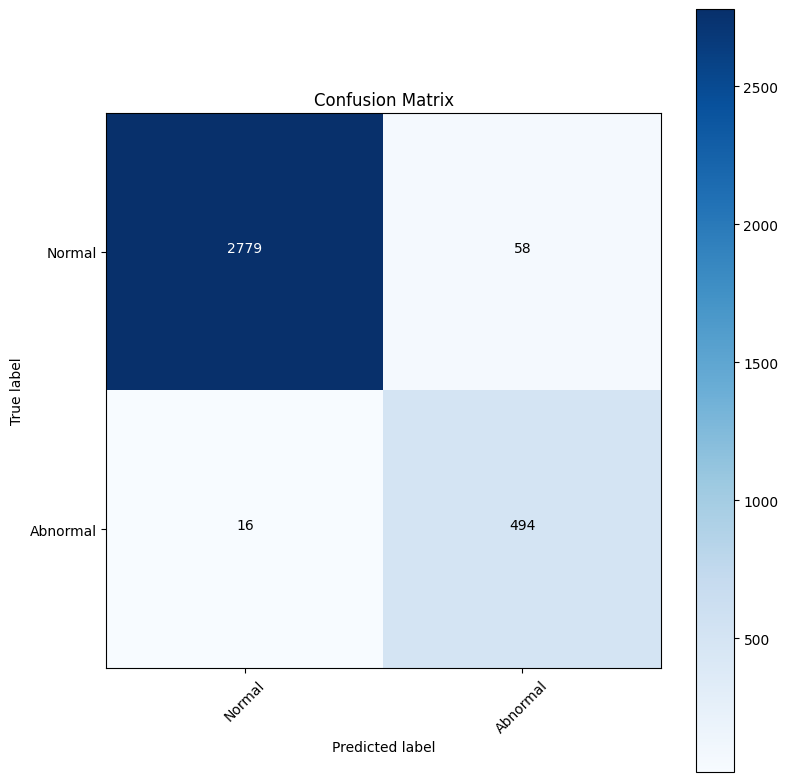

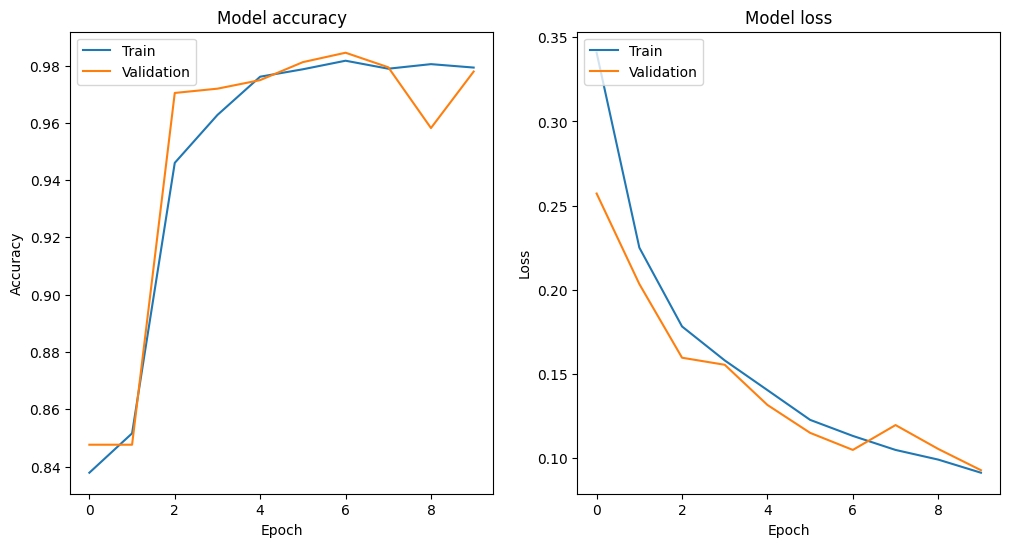

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_test, y_pred_classes)
plot_confusion_matrix(cm, classes=['Normal', 'Abnormal'], title='Confusion Matrix')

# Plot training history
plot_training_history(history)

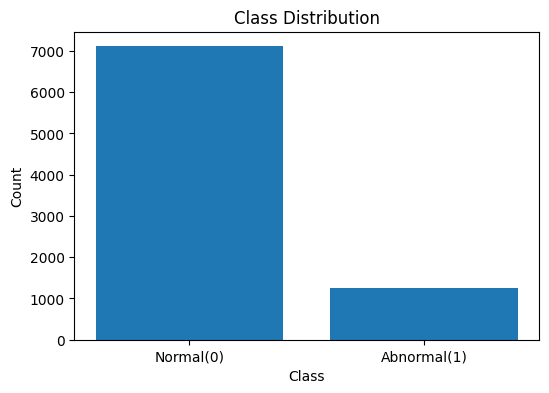

In [ ]:

# Assuming 'labels' contains the class labels where 0 represents 'Normal' and 1 represents 'Abnormal'

# Calculate class distribution
normal_count = np.sum(labels == 0)
abnormal_count = np.sum(labels == 1)

# Plot class distribution
plt.figure(figsize=(6, 4))
plt.bar(['Normal(0)', 'Abnormal(1)'], [normal_count, abnormal_count])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


#**Time Series Classifier**
###Multi-class, multivariate classification

In [ ]:
pip install tsai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
from tsai.all import *
import sklearn.metrics as skm
my_setup()

os              : Linux-6.1.58+-x86_64-with-glibc2.35
python          : 3.10.12
tsai            : 0.3.9
fastai          : 2.7.14
fastcore        : 1.5.29
torch           : 2.2.1+cu121
device          : 1 gpu (['Tesla T4'])
cpu cores       : 1
threads per cpu : 2
RAM             : 12.67 GB
GPU memory      : [15.0] GB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tsai.data.external import *
from tsai.data.preprocessing import *
from tsai.models.InceptionTimePlus import *
from tsai.basics import combine_split_data
from tsai.basics import *


# Load data from CSV
data = pd.read_csv('output_1.csv')

# Separate features and labels
X = data.drop(columns=['Class '])
y = data['Class ']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,time
0,0.244862,0.872796,1.075506,0.853178,00:01
1,0.204182,0.906250,3.252839,0.806625,00:01
2,0.204033,0.908654,0.792046,0.809311,00:03
3,0.169469,0.929487,2.830397,0.758878,00:01
4,0.153732,0.938902,0.304434,0.893763,00:01
5,0.149065,0.940705,0.984524,0.434796,00:01
6,0.133024,0.947115,1.689688,0.517756,00:01
7,0.133455,0.942508,0.141178,0.929275,00:01
8,0.106753,0.957933,0.099845,0.964488,00:01
9,0.090232,0.967147,0.076476,0.972247,00:02


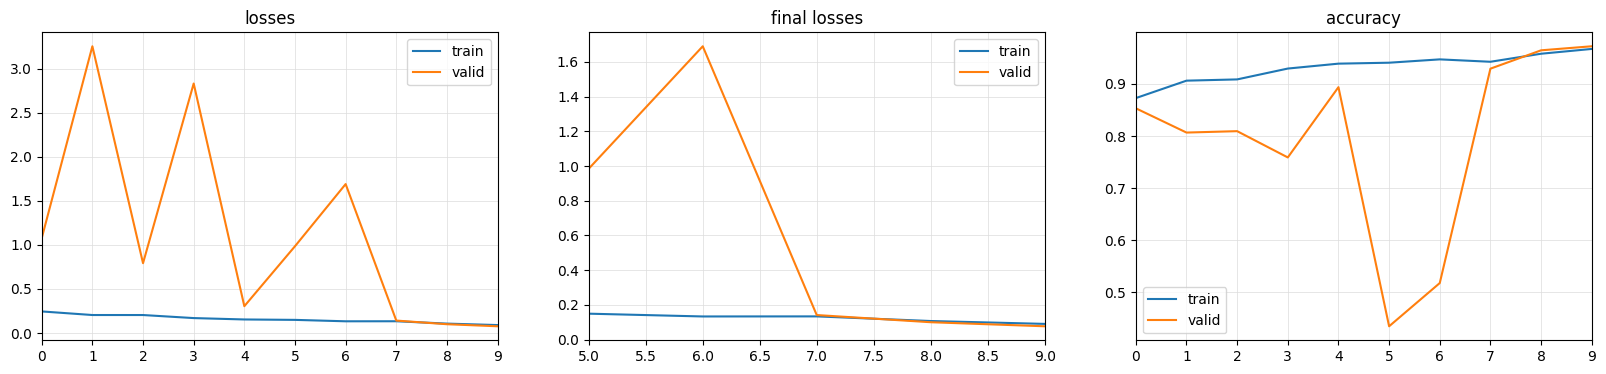

Accuracy: 0.97224709042077
Precision: 0.8647166361974405
Recall: 0.9613821138211383
F1 Score: 0.9104908565928778


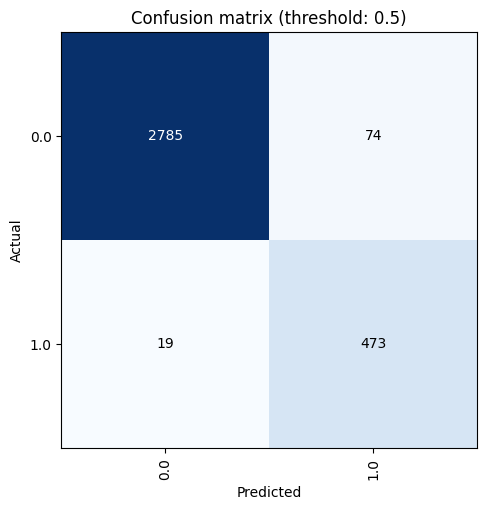

In [ ]:

X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])
X = X.astype(np.float32)
y = y.astype(np.float32)
tfms = [None, TSClassification()]
batch_tfms = [TSStandardize(by_sample=True)]
learn = TSClassifier(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, arch=InceptionTimePlus, arch_config=dict(fc_dropout=.5), train_metrics=True)
learn.fit_one_cycle(10, 1e-2)
learn.export("mv_clf.pkl")
learn.plot_metrics()
learn.plot_confusion_matrix()

# Make predictions
preds, targets = learn.get_preds()

# Calculate accuracy
accuracy = accuracy_score(targets, np.argmax(preds, axis=1))
print(f'Accuracy: {accuracy}')

# Calculate precision
precision = precision_score(targets, np.argmax(preds, axis=1))
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(targets, np.argmax(preds, axis=1))
print(f'Recall: {recall}')

# Calculate F1 score
f1 = f1_score(targets, np.argmax(preds, axis=1))
print(f'F1 Score: {f1}')

